In [ ]:
#!pip install python-dotenv huggingface_hub datasets matplotlib transformers scikit-learn numpy gensim

#Download Dataset


In [ ]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# environment
load_dotenv(override=True)

# Get the HF token from environment variables
hf_token = os.getenv('HF_TOKEN')

# Log in to Hugging Face
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [ ]:
rawdata = load_dataset("cogsci13/Amazon-Reviews-2023-Books-Meta", split="full", trust_remote_code=True)

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cogsci13/Amazon-Reviews-2023-Books-Meta' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cogsci13/Amazon-Reviews-2023-Books-Meta' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and re

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

data/full-00000-of-00028.parquet:   0%|          | 0.00/322M [00:00<?, ?B/s]

data/full-00001-of-00028.parquet:   0%|          | 0.00/306M [00:00<?, ?B/s]

data/full-00002-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00003-of-00028.parquet:   0%|          | 0.00/307M [00:00<?, ?B/s]

data/full-00004-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00005-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00006-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00007-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00008-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00009-of-00028.parquet:   0%|          | 0.00/305M [00:00<?, ?B/s]

data/full-00010-of-00028.parquet:   0%|          | 0.00/302M [00:00<?, ?B/s]

data/full-00011-of-00028.parquet:   0%|          | 0.00/302M [00:00<?, ?B/s]

data/full-00012-of-00028.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

data/full-00013-of-00028.parquet:   0%|          | 0.00/275M [00:00<?, ?B/s]

data/full-00014-of-00028.parquet:   0%|          | 0.00/297M [00:00<?, ?B/s]

data/full-00015-of-00028.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

data/full-00016-of-00028.parquet:   0%|          | 0.00/287M [00:00<?, ?B/s]

data/full-00017-of-00028.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

data/full-00018-of-00028.parquet:   0%|          | 0.00/293M [00:00<?, ?B/s]

data/full-00019-of-00028.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

data/full-00020-of-00028.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

data/full-00021-of-00028.parquet:   0%|          | 0.00/293M [00:00<?, ?B/s]

data/full-00022-of-00028.parquet:   0%|          | 0.00/223M [00:00<?, ?B/s]

data/full-00023-of-00028.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

data/full-00024-of-00028.parquet:   0%|          | 0.00/204M [00:00<?, ?B/s]

data/full-00025-of-00028.parquet:   0%|          | 0.00/204M [00:00<?, ?B/s]

data/full-00026-of-00028.parquet:   0%|          | 0.00/205M [00:00<?, ?B/s]

data/full-00027-of-00028.parquet:   0%|          | 0.00/205M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/4448181 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/28 [00:00<?, ?it/s]

#Data Exploration

In [ ]:
len(rawdata) #4 trieu

4448181

In [ ]:
print(rawdata[0])

{'main_category': 'Books', 'title': 'Chaucer', 'average_rating': 4.5, 'rating_number': 29, 'features': [], 'description': [], 'price': '8.23', 'images': {'hi_res': [None], 'large': ['https://m.media-amazon.com/images/I/41X61VPJYKL._SX334_BO1,204,203,200_.jpg'], 'thumb': [None], 'variant': ['MAIN']}, 'videos': {'title': [], 'url': [], 'user_id': []}, 'store': 'Peter Ackroyd (Author)', 'categories': ['Books', 'Literature & Fiction', 'History & Criticism'], 'details': '{"Publisher": "Chatto & Windus; First Edition (January 1, 2004)", "Language": "English", "Hardcover": "196 pages", "ISBN 10": "0701169850", "ISBN 13": "978-0701169855", "Item Weight": "10.1 ounces", "Dimensions": "5.39 x 0.71 x 7.48 inches"}', 'parent_asin': '0701169850', 'bought_together': None, 'subtitle': 'Hardcover – Import, January 1, 2004', 'author': "{'avatar': 'https://m.media-amazon.com/images/I/21Je2zja9pL._SY600_.jpg', 'name': 'Peter Ackroyd', 'about': ['Peter Ackroyd, (born 5 October 1949) is an English biograph

In [ ]:
datapoint = rawdata[1]
datapoint

{'main_category': 'Books',
 'title': 'Notes from a Kidwatcher',
 'average_rating': 5.0,
 'rating_number': 1,
 'features': ["Contains 23 selected articles by this influential writer, researcher, educator, and speaker. They're grouped around six major themes inherent in teacher education: culture and community; miscue analysis, reading strategies and comprehension; print awareness and the roots of literacy; the writing process; kidwatching; and whole language theory. No index. Annotation c. by Book News, Inc., Portland, Or."],
 'description': ['About the Author',
  "SANDRA WILDE, Ph.D., is widely recognized for her expertise in developmental spelling and her advocacy of holistic approaches to spelling and phonics. She is Professor of Curriculum and Instruction at Portland State University in Oregon. She is best known for her work in invented spelling, phonics and miscue analysis. She specializes in showing teachers how kids' invented spellings and miscues can help us work with them in mo

In [ ]:
datapoint = rawdata[5]
print(datapoint["title"])
print(datapoint["description"])
print(datapoint["features"])
print(datapoint["details"])
print(datapoint["price"])

Writings from a Black Woman Living in the Land of the "Free": Strength, Power, Resilience
[]
["Take a step into the modern perspective of a young black woman living in America. Tori Ruff explores the injustices and pain endured by the African American community for centuries. Through a series of writings, she speaks on topics including police brutality, racism, and discrimination. 'Writings from a Black Woman Living in the Land of the Free' takes readers on a journey of empathy and a sense of empowerment."]
{"Publisher": "Independently published (December 30, 2021)", "Language": "English", "Paperback": "24 pages", "ISBN 13": "979-8528537702", "Item Weight": "3.2 ounces", "Dimensions": "7 x 0.06 x 9 inches"}
4.05


In [ ]:
#Co bao nhieu sach co gia ?
prices = 0
for datapoint in rawdata:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices += 1
    except ValueError as e:
        pass

print(f"There are {prices:,} with prices which is {prices/len(rawdata)*100:,.1f}%")

KeyboardInterrupt: 

In [ ]:
#Chi loc ban ghi co gia
filtered = (dp for dp in rawdata if "price" in dp and isinstance(dp["price"], str) and dp["price"].replace('.', '', 1).isdigit() and float(dp["price"]) > 0)

In [ ]:
# Convert a sample of filtered data to in-memory dataset - Gioi han 100k xem cho de
sampled_data = []
for i, dp in enumerate(filtered):
    if i >= 100000:  # pick a reasonable sample size, e.g. 10k
        break
    sampled_data.append(dp)

dataset = Dataset.from_list(sampled_data)
print(f"Loaded {len(dataset):,} examples with prices.")

Loaded 100,000 examples with prices.


In [ ]:
prices = []
lengths = []

for datapoint in dataset:
    try:
      #Lưu tất cả vào lengths -> gồm title , description , features , details -> thành lengths
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            contents = (
                datapoint["title"] +
                str(datapoint.get("description", "")) +
                str(datapoint.get("features", "")) +
                str(datapoint.get("details", ""))
            )
            lengths.append(len(contents))
    except ValueError:
        pass

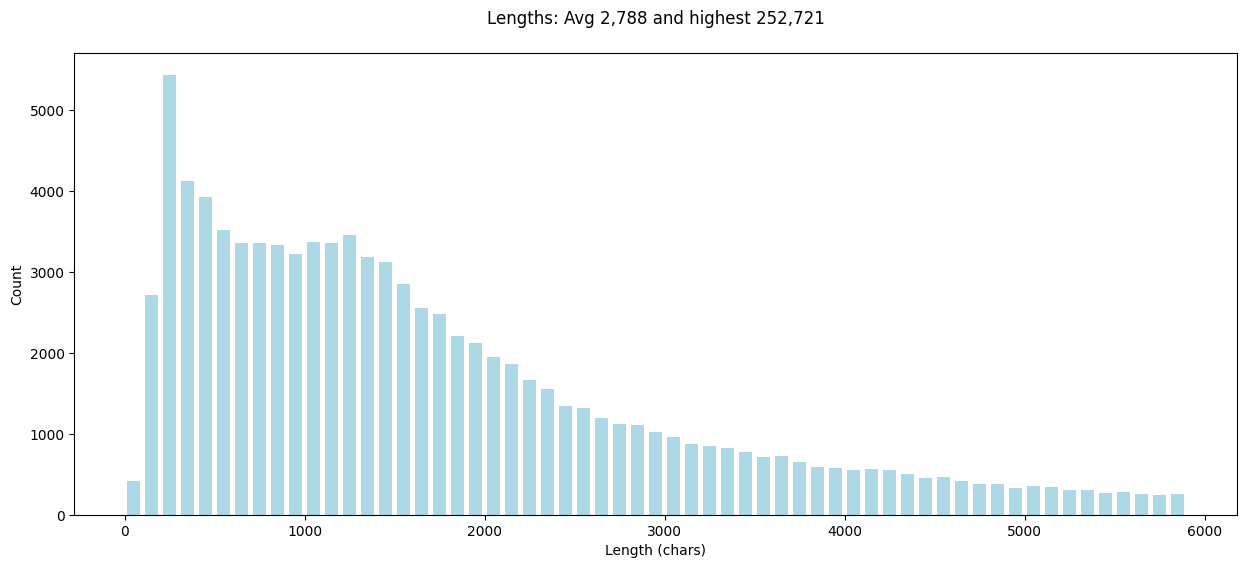

In [ ]:
# Plot lengths  -> Xem xét dữ liệu để quyết định token (số token)
plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

Thấy được là số lengths gồm (tiêu đề , mô tả ... ) có độ dài 0-1000 là nhiều nhất , ngưỡng căn bằng là ngưỡng từ 3000-6000

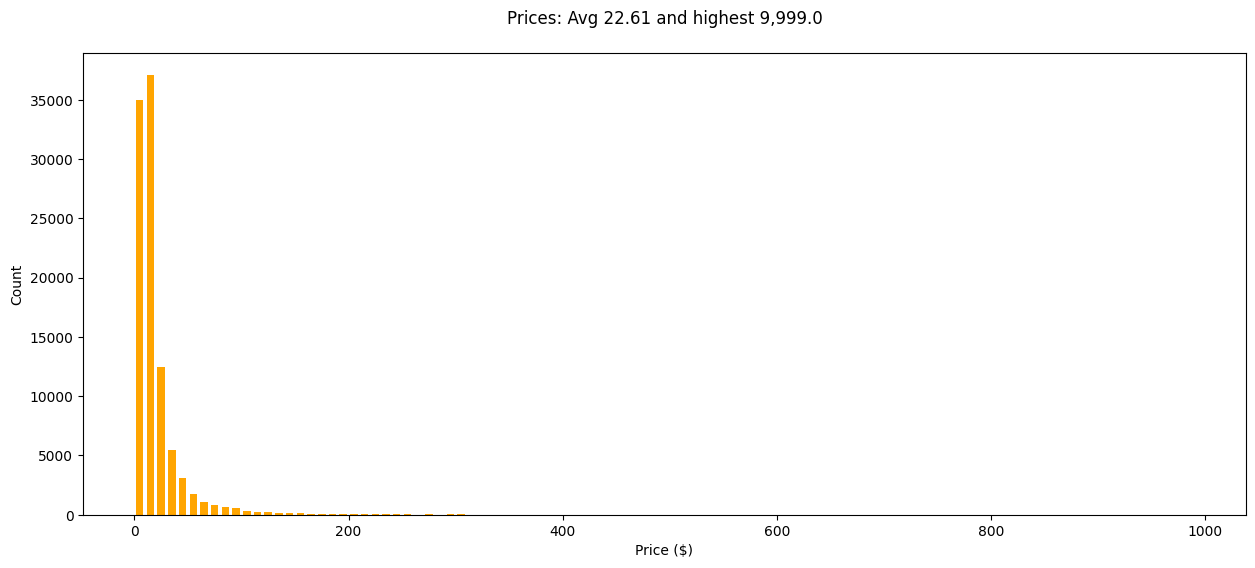

In [ ]:
# Plot prices -> Xem có sách giá quá cao
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

Thấy được là sách có giá trên 5k đôla là nhiều -> Gia trung bình là 22.61 đô cao nhất hơn 35k đô

#Data Transform

Đưa data về đúng format

In [ ]:
from transformers import AutoTokenizer
import re

BASE_MODEL = "meta-llama/Meta-Llama-3.1-8B"
MIN_TOKENS = 150  # Any less than this, and we don't have enough useful content
MAX_TOKENS = 160  # Truncate after this many tokens
MIN_CHARS = 300
CEILING_CHARS = MAX_TOKENS * 7 #1 token 7 kí tự

In [ ]:
def clean_text(text: str) -> str:
    # Remove unnecessary characters
    text = re.sub(r'[:\[\]"{}【】\s]+', ' ', text).strip()
    text = text.replace(" ,", ",").replace(",,,",",").replace(",,",",")
    words = text.split(' ')
    # Remove likely product codes
    select = [word for word in words if len(word) < 7 or not any(char.isdigit() for char in word)]
    return " ".join(select)

In [ ]:
text = 'Writings from a Black Woman Living in the Land of the "Free": Strength, Power, Resilience'
cleaned = clean_text(text)
print(cleaned)

Writings from a Black Woman Living in the Land of the Free Strength, Power, Resilience


In [ ]:
# BookItems.py

In [ ]:
from BookItems import BookItem

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3.1-8B.
403 Client Error. (Request ID: Root=1-690c51f0-6ef74ce67c75355a2c5654bd;42963bcd-19d6-4bed-b752-464008f83276)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B/resolve/main/config.json.
Access to model meta-llama/Llama-3.1-8B is restricted and you are not in the authorized list. Visit https://huggingface.co/meta-llama/Llama-3.1-8B to ask for access.

In [ ]:
book_items = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        book_item = BookItem(datapoint, price)
        if book_item.include:
            book_items.append(book_item)
    except (ValueError, TypeError):
        pass  # Skip if any unexpected error still shows up

In [ ]:
print(f"There are {len(book_items):,} books")

In [ ]:
book_items[0]

In [ ]:
print(book_items[8000].prompt)

In [ ]:
# Plot the distribution of token counts

tokens = [item.token_count for item in book_items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

In [ ]:
# Plot the distribution of prices

prices = [item.price for item in book_items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 300, 10))
plt.show()

#Bring my raw data

In [ ]:
from BookLoader import load_books_from_rawdata

book_items = load_books_from_rawdata(rawdata, workers=8)
print(f" A grand total of {len(book_items):,} books")

In [ ]:
print(book_items[0].prompt)

In [ ]:
# Plot the distribution of token counts

tokens = [item.token_count for item in book_items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

In [ ]:
# Plot the distribution of prices

prices = [item.price for item in book_items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 1000, 10))
plt.show()

#sort data for more balance


In [ ]:
from collections import defaultdict
import numpy as np
import random

# Step 1: Create a dict to hold items bucketed by rounded price
price_buckets = defaultdict(list)
for item in book_items:
    rounded_price = round(item.price)
    price_buckets[rounded_price].append(item)

# Step 2: Set random seeds for reproducibility
np.random.seed(123)
random.seed(123)

# Step 3: Sample from each bucket based on your logic
sample = []
for price in range(1, 1000):
    bucket = price_buckets[price]

    if price >= 50:
        sample.extend(bucket)
    elif len(bucket) <= 2000:
        sample.extend(bucket)
    else:
        selected_indices = np.random.choice(len(bucket), size=2000, replace=False)
        selected = [bucket[i] for i in selected_indices]
        sample.extend(selected)

print(f"There are {len(sample):,} items in the sample")

In [ ]:
# Plot the distribution of prices in sample

prices = [float(item.price) for item in sample]
plt.figure(figsize=(15, 10))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 5))
plt.show()

#Correlation

In [ ]:
# How does the price vary with the character count of the prompt?

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

#Split dataset

In [ ]:
random.seed(123)

# Shuffle full dataset
random.shuffle(sample)

# Calculate split index
split_idx = int(0.9 * len(sample))  # 90% training

# Split into training and test sets
train = sample[:split_idx]
test = sample[split_idx:]

# Print result
print(f"Divided into a training set of {len(train):,} items and a test set of {len(test):,} items")

In [ ]:
print(train[0].prompt)

In [ ]:
print(test[0].test_prompt())

In [ ]:
# Plot the distribution of prices in the first 2000 test points

prices = [float(item.price) for item in test[:2000]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 5))
plt.show()

#Upload dataset to hugging face hub

In [ ]:
# extract prompt and price
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]

test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [ ]:
# Hugging face dataset
train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
# bunddle
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [ ]:
# upload to hugging face hub
HF_USER = "Timi1511"
DATASET_NAME = f"{HF_USER}/bookpricer-data"
dataset.push_to_hub(DATASET_NAME, private=True)

In [ ]:
# write .pkl file for reuse
import pickle

with open('train.pkl', 'wb') as file:
    pickle.dump(train, file)

with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)

In [ ]:
# open .pkl files from local
import pickle

with open('train.pkl', 'rb') as file:
    train = pickle.load(file)

with open('test.pkl', 'rb') as file:
    test = pickle.load(file)